In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from helperFunctions import *
import numpy as np 


class Model:
    def __init__(self):
        self.model = None
        self.target = None
        self.features = None
        self.data = None
        self.testX = None
        self.testY = None
        self.trainX = None
        self.trainY = None
        
    def _readDataset(self, filename):
        self.data = pd.read_csv(filename)

    def _dropNulls(self):
        self.data.drop(["education"], axis = 1, inplace = True) #dropping this improved accuracy
        self.data.dropna(inplace = True)
    
    def _saveProcessedData(self):
        self.features = self.data.drop("TenYearCHD", axis = 1)
        self.target = self.data.TenYearCHD
        self.data.to_csv("../data/processedData.csv")
    
    def _trainTestSplit(self):
        self.trainX, self.testX, self.trainY, self.testY = train_test_split(self.features, self.target, test_size=0.2)
    
    def preProcessing(self, filename):
        self._readDataset(filename)
        self._dropNulls()
        self.data.reset_index(drop = True)
        self._saveProcessedData()
        self._trainTestSplit()
        #display(self.data.corr())

In [3]:
model = Model()
model.preProcessing("../data/framingham.csv")
model.data.TenYearCHD.hist()
print()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x105b08908>,
      dtype=object)

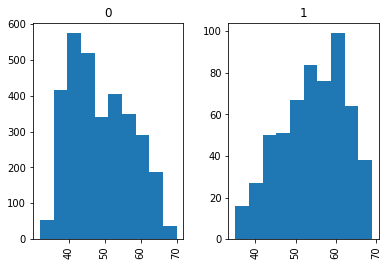

In [4]:
model.data.hist("age", "TenYearCHD")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a18b86080>,
      dtype=object)

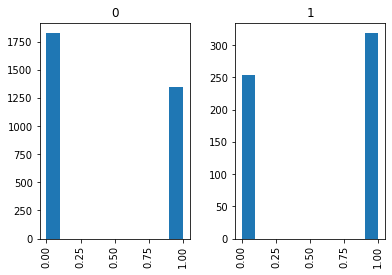

In [5]:
model.data.hist("male", "TenYearCHD")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18e204e0>]],
      dtype=object)

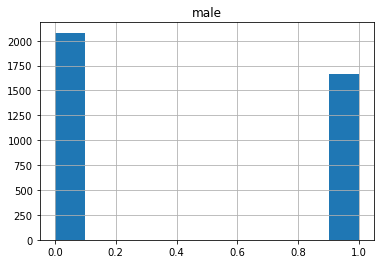

In [7]:
model.data.hist("male")

In [7]:
model.data.corr("spearman")

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.025380,0.203861,0.289066,-0.052359,-0.002509,0.002987,0.011847,-0.064560,-0.014445,0.063291,0.134355,-0.110601,-0.008922,0.096056
age,-0.025380,1.000000,-0.209728,-0.211334,0.127314,0.050446,0.304856,0.109173,0.287662,0.385982,0.208533,0.144913,-0.008718,0.112617,0.228873
currentSmoker,0.203861,-0.209728,1.000000,0.933517,-0.051828,-0.037582,-0.104753,-0.045319,-0.054410,-0.132634,-0.119939,-0.171562,0.062916,-0.076509,0.021722
cigsPerDay,0.289066,-0.211334,0.933517,1.000000,-0.052152,-0.039793,-0.092697,-0.043581,-0.044757,-0.113808,-0.090722,-0.137550,0.070277,-0.086375,0.042859
BPMeds,-0.052359,0.127314,-0.051828,-0.052152,1.000000,0.111595,0.263089,0.056322,0.086004,0.213349,0.183217,0.091138,-0.005895,0.012217,0.084704
prevalentStroke,-0.002509,0.050446,-0.037582,-0.039793,0.111595,1.000000,0.065208,0.009417,0.016547,0.061332,0.055636,0.017864,-0.012173,0.009811,0.047669
prevalentHyp,0.002987,0.304856,-0.104753,-0.092697,0.263089,0.065208,1.000000,0.082096,0.162706,0.697654,0.616238,0.288438,0.130288,0.086608,0.178779
diabetes,0.011847,0.109173,-0.045319,-0.043581,0.056322,0.009417,0.082096,1.000000,0.036025,0.090726,0.047396,0.075931,0.063628,0.223661,0.093190
totChol,-0.064560,0.287662,-0.054410,-0.044757,0.086004,0.016547,0.162706,0.036025,1.000000,0.230371,0.190897,0.150011,0.093325,0.029591,0.086189
sysBP,-0.014445,0.385982,-0.132634,-0.113808,0.213349,0.061332,0.697654,0.090726,0.230371,1.000000,0.780045,0.326882,0.171678,0.117990,0.195925


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a17aa1630>,
      dtype=object)

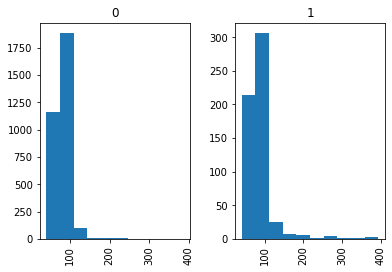

In [13]:
model.data.hist("glucose", "TenYearCHD")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a17dc1d68>,
      dtype=object)

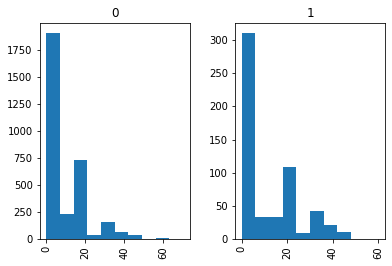

In [15]:
model.data.hist("cigsPerDay", "TenYearCHD")

In [8]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(model.trainX,model.trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=model.trainX.columns).sort_values(ascending=False)
feature_imp

sysBP              0.138203
BMI                0.135872
totChol            0.128098
age                0.125936
glucose            0.125154
diaBP              0.119960
heartRate          0.103331
cigsPerDay         0.052230
male               0.023012
prevalentHyp       0.017984
currentSmoker      0.012035
BPMeds             0.007586
diabetes           0.006529
prevalentStroke    0.004069
dtype: float64

No handles with labels found to put in legend.


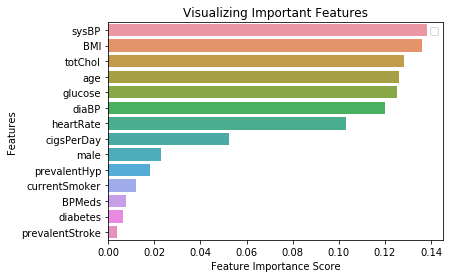

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

/Users/mudasir/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


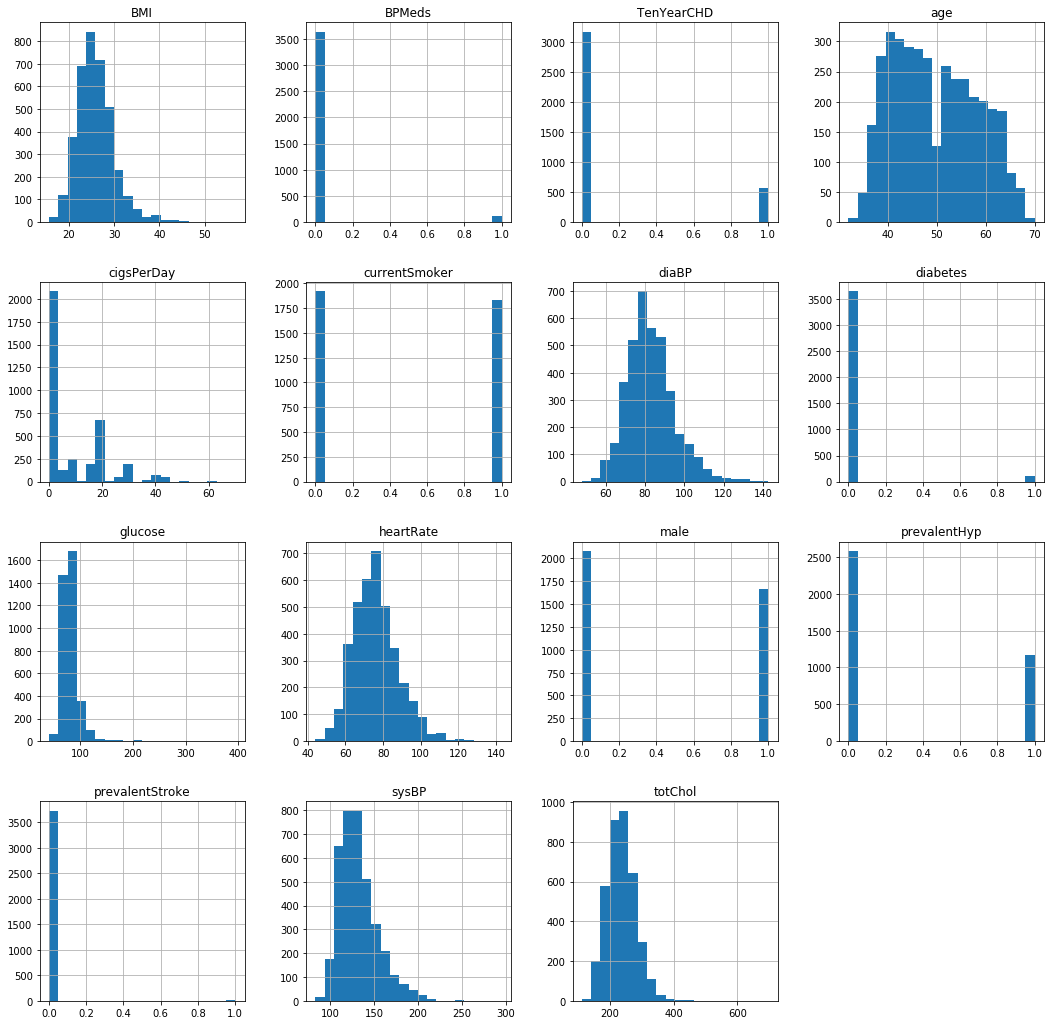

In [15]:
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
model.data.hist(ax=ax, bins = 20)
plt.show()

In [16]:
import seaborn as sns

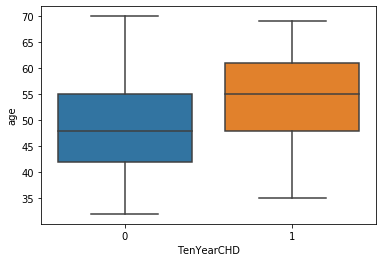

In [21]:
sns.boxplot(model.data.TenYearCHD, model.data.age)

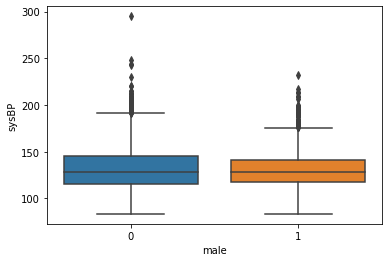

In [27]:
sns.boxplot(model.data.male, model.data.sysBP)

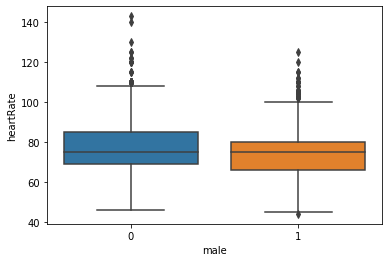

In [28]:
sns.boxplot(model.data.male, model.data.heartRate)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b89d208>,
      dtype=object)

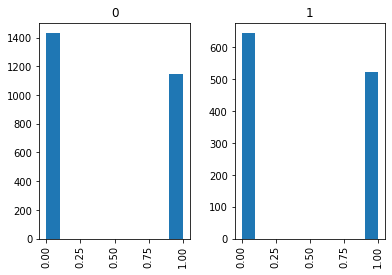

In [32]:
model.data.male.hist(model.data.prevalentHyp)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d5f7908>,
      dtype=object)

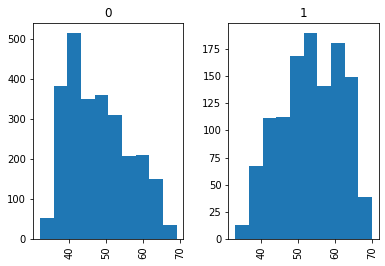

In [34]:
model.data.age.hist(model.data.prevalentHyp)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d51ba58>,
      dtype=object)

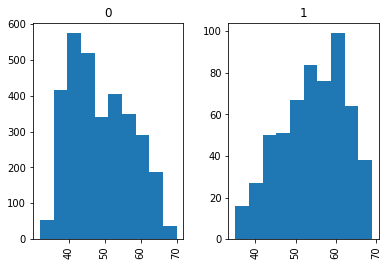

In [35]:
model.data.age.hist(model.data.TenYearCHD)

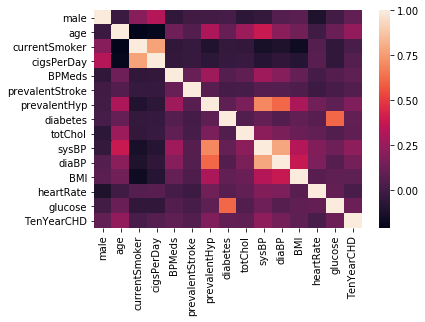

In [37]:
sns.heatmap(model.data.corr())

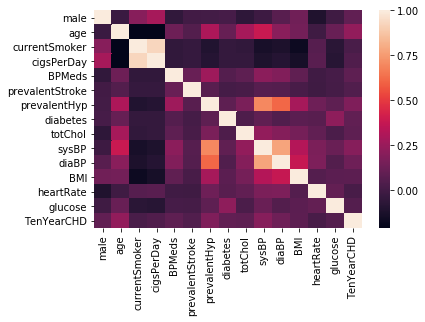

In [40]:
sns.heatmap(model.data.corr('spearman'))